In [169]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [170]:
data = pd.read_csv("/Users/kendallscherer/DS4001G1P2/post_lasso_data_cleaning.csv")
data

,college_name,total_students,lower_class,lower_middle_class,middle_class,upper-middle_class,upper_class,inventor,total_patents,total_cites,...,exp_instr_2012,exp_instr_2000,pct_arthuman_2000,pct_business_2000,pct_health_2000,pct_multidisci_2000,pct_publicsocial_2000,pct_stem_2000,pct_socialscience_2000,pct_tradepersonal_2000
0,University Of Hawaii And Hawaii Community Coll...,27002,3205,4527,5628,6957,6685,0.001037,22,55,...,9.113128e+07,6.745800e+07,6.681707,23.255814,6.716418,23.654982,5.102395,11.714683,17.216244,5.657758
1,Coast Community College District,24340,4183,3829,4311,5066,6951,0.001643,76,333,...,8.545126e+07,7.109728e+07,1.856764,7.625995,2.917772,68.866043,0.862069,3.348806,0.132626,14.389920
2,Kern & North Orange County Community College D...,18765,2521,3091,3564,4410,5179,0.001119,28,22,...,6.832648e+07,5.776963e+07,3.271693,13.342816,12.147938,43.641537,7.425320,7.283073,5.092461,7.795164
3,San Mateo County Community College District,10936,1253,1658,2187,2513,3325,0.001646,35,2474,...,2.064012e+07,1.509598e+07,3.658537,22.143774,10.077022,25.673941,6.033376,5.584082,1.476252,25.353018
4,Foothill-Deanza Community College District,16619,2245,2287,2798,3206,6083,0.003189,137,1497,...,1.122423e+08,7.456388e+07,3.728814,19.171375,15.329567,33.370998,1.770245,8.964219,4.896422,12.768361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,"New School, The",2691,273,318,315,428,1357,0.005946,79,124,...,1.020730e+08,5.070360e+07,64.835167,0.000000,0.000000,25.164835,6.483517,3.516484,0.000000,0.000000
418,Milwaukee Institute Of Art & Design,640,60,67,130,170,213,0.020313,124,358,...,5.261849e+06,5.209564e+06,96.590912,0.000000,0.000000,0.000000,0.000000,3.409091,0.000000,0.000000
419,Art Institute Of Colorado,2433,306,455,504,505,663,0.005343,29,62,...,7.798850e+06,5.350407e+06,72.885033,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.114967
420,Savannah College Of Art And Design,4675,253,448,642,1004,2328,0.009412,160,417,...,8.349944e+07,1.785542e+07,87.878784,0.000000,0.000000,3.208556,0.000000,8.912656,0.000000,0.000000


In [139]:
data.isnull().sum()

college_name              0
total_students            0
lower_class               0
lower_middle_class        0
middle_class              0
                         ..
pct_multidisci_2000       2
pct_publicsocial_2000     2
pct_stem_2000             2
pct_socialscience_2000    2
pct_tradepersonal_2000    2
Length: 74, dtype: int64

In [140]:
missing = ((data.isnull().sum()/(len(data)))*100).sort_values()

In [141]:
data.describe()

,total_students,lower_class,lower_middle_class,middle_class,upper-middle_class,upper_class,inventor,total_patents,total_cites,tier,...,exp_instr_2012,exp_instr_2000,pct_arthuman_2000,pct_business_2000,pct_health_2000,pct_multidisci_2000,pct_publicsocial_2000,pct_stem_2000,pct_socialscience_2000,pct_tradepersonal_2000
count,422.000000,422.000000,422.00000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,...,4.140000e+02,4.130000e+02,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,10016.677725,834.227488,1253.71327,1753.672986,2427.509479,3747.554502,0.008819,99.625592,230.075829,5.258294,...,1.680231e+08,9.241654e+07,12.335177,17.389596,6.893036,12.105804,3.299551,22.206238,23.116354,2.605980
std,9794.115810,1078.527597,1533.85949,2121.916710,2729.063334,3441.239748,0.015720,169.796307,400.773046,2.287447,...,2.393971e+08,1.176336e+08,14.436397,12.622131,7.457421,15.909486,4.323284,18.604551,15.908738,7.333828
min,498.000000,12.000000,38.00000,79.000000,117.000000,213.000000,0.000639,0.000000,0.000000,1.000000,...,3.335296e+06,1.934265e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3417.000000,153.250000,271.75000,462.250000,711.250000,1496.500000,0.001910,20.000000,23.000000,4.000000,...,4.483718e+07,2.502546e+07,4.333290,9.868525,0.000000,2.318899,0.000000,11.714627,4.922202,0.000000
50%,8102.500000,563.500000,958.50000,1394.000000,1990.500000,2763.500000,0.004241,37.000000,71.000000,5.000000,...,8.368237e+07,4.784724e+07,9.032944,17.519450,5.263817,5.987000,2.167929,17.016489,26.533472,0.000000
75%,13553.750000,1086.000000,1657.25000,2328.500000,3281.250000,4783.250000,0.007881,97.750000,232.750000,6.000000,...,1.857171e+08,1.075567e+08,15.740785,23.426979,11.035912,14.421801,5.118142,26.928515,34.884366,1.047859
max,129373.000000,10815.000000,19736.00000,31377.000000,39789.000000,27656.000000,0.137050,1309.000000,3115.000000,10.000000,...,1.879626e+09,7.261980e+08,100.000000,100.000000,39.292034,99.952919,44.744747,99.696976,65.758751,77.316681


In [142]:
#correlation test
correlation_data = data.drop('college_name', axis=1)
correlation_data

target = 'total_patents'
target


# Compute correlations between the selected variable and the rest of the numeric columns
correlations = correlation_data.corr()[target].drop(target)

print(f"Correlation of '{target}' with other columns:")
hello = correlations.sort_values(ascending=False)

Correlation of 'total_patents' with other columns:


In [143]:
top_corr = ['total_cites','exp_instr_2000','upper_class','exp_instr_2012','inventor']

In [144]:
#TOTAL CITIES
#for col in top_corr:
    #print(col)
    #plt.hist(data[col], bins=50, density=True, alpha=0.5, color='blue')
    #plt.show()
    #sns.scatterplot(data=data, x='total_patents', y=col)


In [145]:
#columns of interest
#top_10_columns = ['endowment_pc_2000', 'avgfacsal_2001','par_median', 'scorecard_median_earnings_2011','ipeds_enrollment_2013',
           #'k_median_nozero', 'k_median', 'ipeds_enrollment_2000','k_mean','scorecard_netprice_2013']

In [146]:
#for col in top_10_columns:
    #print(col)
    #plt.hist(data[col], bins=30, density=True, alpha=0.5, color='blue')
    #plt.show()

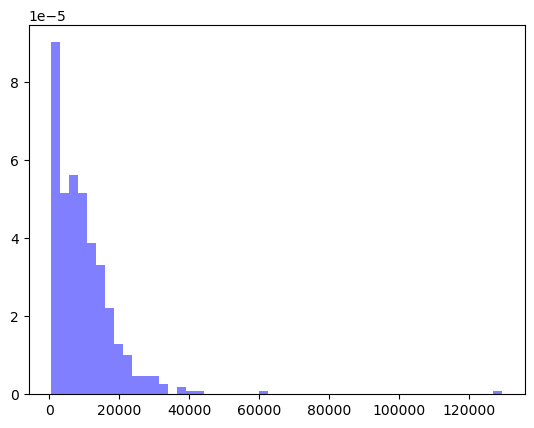

In [147]:
#TOTAL STUDENTS
plt.hist(data['total_students'], bins=50, density=True, alpha=0.5, color='blue')
plt.show()

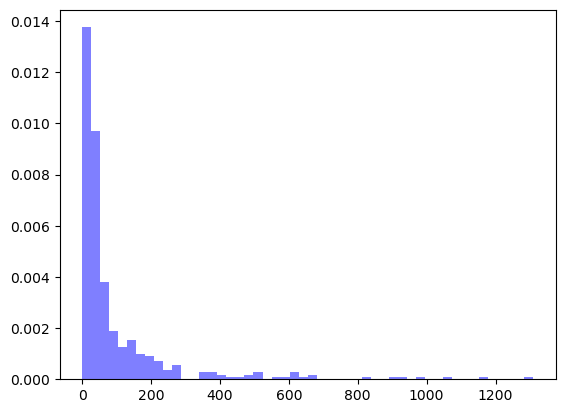

In [148]:
#TOTAL PATENTS
plt.hist(data['total_patents'], bins=50, density=True, alpha=0.5, color='blue')
plt.show()

In [149]:
corr_coefficient = data['total_students'].corr(data['total_patents'])
print(f"Pearson correlation coefficient: {corr_coefficient}")

Pearson correlation coefficient: 0.34471723370559204


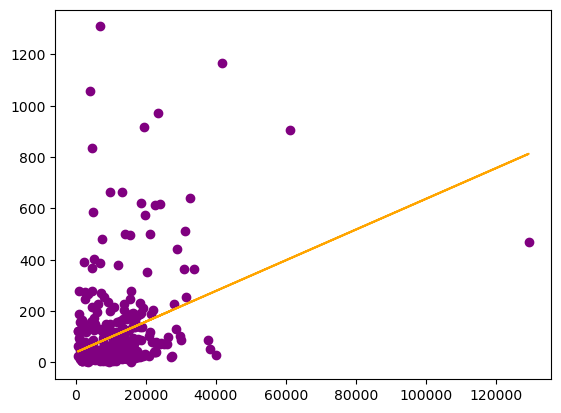

In [150]:
plt.scatter(data['total_students'], data['total_patents'], color='purple', label='Data Points')
m, b = np.polyfit(data['total_students'], data['total_patents'], 1)
plt.plot(data['total_students'], m * data['total_students'] + b, color='orange', label='Trendline')


In [151]:
data['patent_percentage'] = (data['total_patents']/data['total_students'])


In [152]:
data['patent_percentage']

0      0.000815
1      0.003122
2      0.001492
3      0.003200
4      0.008244
         ...   
417    0.029357
418    0.193750
419    0.011919
420    0.034225
421    0.014908
Name: patent_percentage, Length: 422, dtype: float64

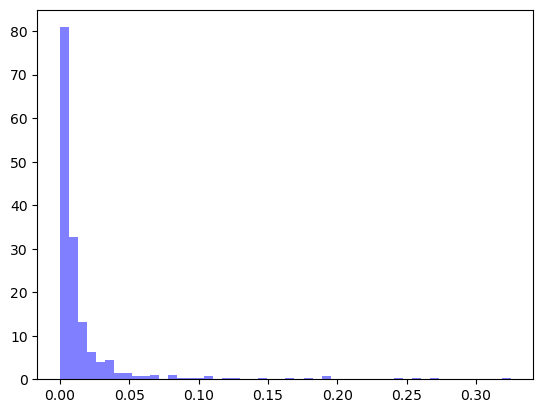

In [153]:
plt.hist(data['patent_percentage'], bins=50, density=True, alpha=0.5, color='blue')
plt.show()

In [154]:
corr_coefficient = data['patent_percentage'].corr(data['total_patents'])
corr_coefficient = data['patent_percentage'].corr(data['total_patents'])
print(f"Pearson correlation coefficient: {corr_coefficient}")


Pearson correlation coefficient: 0.49575910802309203


Pearson correlation coefficient: 0.5450188436495091


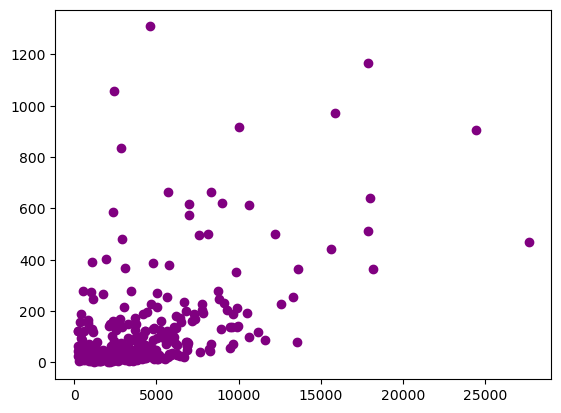

In [155]:
corr_coefficient = data['upper_class'].corr(data['total_patents'])
print(f"Pearson correlation coefficient: {corr_coefficient}")
plt.scatter(data['upper_class'], data['total_patents'], color='purple', label='Data Points')


Pearson correlation coefficient: 0.28316285342481395


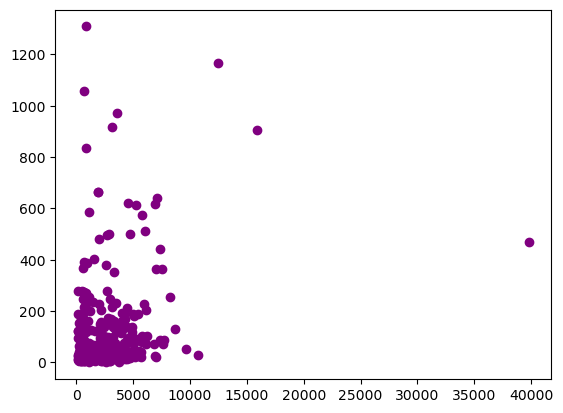

In [156]:
corr_coefficient = data['upper-middle_class'].corr(data['total_patents'])
print(f"Pearson correlation coefficient: {corr_coefficient}")
plt.scatter(data['upper-middle_class'], data['total_patents'], color='purple', label='Data Points')


Pearson correlation coefficient: 0.20373068932999608


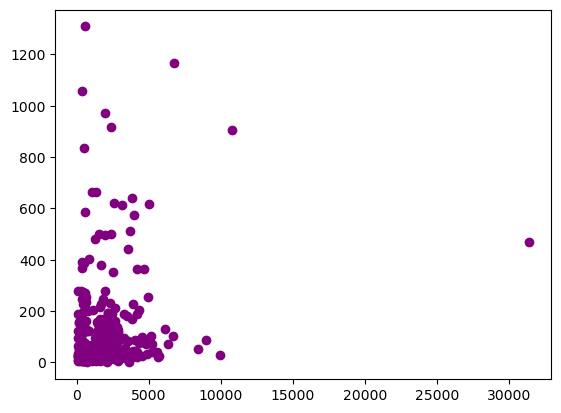

In [157]:
corr_coefficient = data['middle_class'].corr(data['total_patents'])
print(f"Pearson correlation coefficient: {corr_coefficient}")
plt.scatter(data['middle_class'], data['total_patents'], color='purple', label='Data Points')


Pearson correlation coefficient: 0.13772778006594888


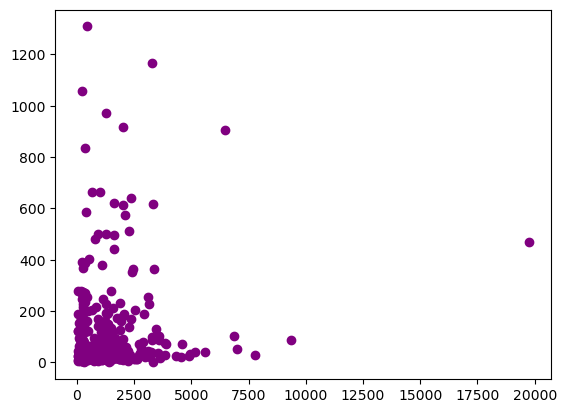

In [158]:
corr_coefficient = data['lower_middle_class'].corr(data['total_patents'])
print(f"Pearson correlation coefficient: {corr_coefficient}")
plt.scatter(data['lower_middle_class'], data['total_patents'], color='purple', label='Data Points')


Pearson correlation coefficient: 0.07819551689013443


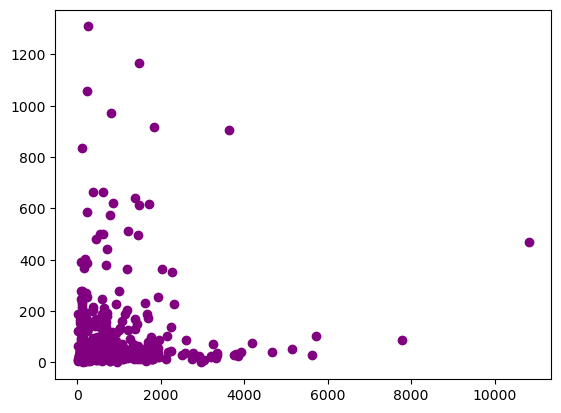

In [159]:
corr_coefficient = data['lower_class'].corr(data['total_patents'])
print(f"Pearson correlation coefficient: {corr_coefficient}")
plt.scatter(data['lower_class'], data['total_patents'], color='purple', label='Data Points')


In [164]:
#corr_coefficient = data['upper_class'].corr(data['total_patents'])
#print(f"Pearson correlation coefficient: {corr_coefficient}")

#corr_coefficient = data['inventor'].corr(data['total_patents'])
#print(f"Pearson correlation coefficient: {corr_coefficient}")

corr_coefficient = data['lower_class_inventor'].corr(data['total_patents'])
print(f"Pearson correlation coefficient: {corr_coefficient}")

KeyError: 'lower_class_inventor'

In [165]:
data = data.drop(13)


In [166]:
data

,college_name,total_students,lower_class,lower_middle_class,middle_class,upper-middle_class,upper_class,inventor,total_patents,total_cites,...,exp_instr_2000,pct_arthuman_2000,pct_business_2000,pct_health_2000,pct_multidisci_2000,pct_publicsocial_2000,pct_stem_2000,pct_socialscience_2000,pct_tradepersonal_2000,patent_percentage
0,University Of Hawaii And Hawaii Community Coll...,27002,3205,4527,5628,6957,6685,0.001037,22,55,...,6.745800e+07,6.681707,23.255814,6.716418,23.654982,5.102395,11.714683,17.216244,5.657758,0.000815
1,Coast Community College District,24340,4183,3829,4311,5066,6951,0.001643,76,333,...,7.109728e+07,1.856764,7.625995,2.917772,68.866043,0.862069,3.348806,0.132626,14.389920,0.003122
2,Kern & North Orange County Community College D...,18765,2521,3091,3564,4410,5179,0.001119,28,22,...,5.776963e+07,3.271693,13.342816,12.147938,43.641537,7.425320,7.283073,5.092461,7.795164,0.001492
3,San Mateo County Community College District,10936,1253,1658,2187,2513,3325,0.001646,35,2474,...,1.509598e+07,3.658537,22.143774,10.077022,25.673941,6.033376,5.584082,1.476252,25.353018,0.003200
4,Foothill-Deanza Community College District,16619,2245,2287,2798,3206,6083,0.003189,137,1497,...,7.456388e+07,3.728814,19.171375,15.329567,33.370998,1.770245,8.964219,4.896422,12.768361,0.008244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,"New School, The",2691,273,318,315,428,1357,0.005946,79,124,...,5.070360e+07,64.835167,0.000000,0.000000,25.164835,6.483517,3.516484,0.000000,0.000000,0.029357
418,Milwaukee Institute Of Art & Design,640,60,67,130,170,213,0.020313,124,358,...,5.209564e+06,96.590912,0.000000,0.000000,0.000000,0.000000,3.409091,0.000000,0.000000,0.193750
419,Art Institute Of Colorado,2433,306,455,504,505,663,0.005343,29,62,...,5.350407e+06,72.885033,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.114967,0.011919
420,Savannah College Of Art And Design,4675,253,448,642,1004,2328,0.009412,160,417,...,1.785542e+07,87.878784,0.000000,0.000000,3.208556,0.000000,8.912656,0.000000,0.000000,0.034225


In [167]:
data.to_csv('without_MSU.csv', index=False)

In [168]:
data

,college_name,total_students,lower_class,lower_middle_class,middle_class,upper-middle_class,upper_class,inventor,total_patents,total_cites,...,exp_instr_2000,pct_arthuman_2000,pct_business_2000,pct_health_2000,pct_multidisci_2000,pct_publicsocial_2000,pct_stem_2000,pct_socialscience_2000,pct_tradepersonal_2000,patent_percentage
0,University Of Hawaii And Hawaii Community Coll...,27002,3205,4527,5628,6957,6685,0.001037,22,55,...,6.745800e+07,6.681707,23.255814,6.716418,23.654982,5.102395,11.714683,17.216244,5.657758,0.000815
1,Coast Community College District,24340,4183,3829,4311,5066,6951,0.001643,76,333,...,7.109728e+07,1.856764,7.625995,2.917772,68.866043,0.862069,3.348806,0.132626,14.389920,0.003122
2,Kern & North Orange County Community College D...,18765,2521,3091,3564,4410,5179,0.001119,28,22,...,5.776963e+07,3.271693,13.342816,12.147938,43.641537,7.425320,7.283073,5.092461,7.795164,0.001492
3,San Mateo County Community College District,10936,1253,1658,2187,2513,3325,0.001646,35,2474,...,1.509598e+07,3.658537,22.143774,10.077022,25.673941,6.033376,5.584082,1.476252,25.353018,0.003200
4,Foothill-Deanza Community College District,16619,2245,2287,2798,3206,6083,0.003189,137,1497,...,7.456388e+07,3.728814,19.171375,15.329567,33.370998,1.770245,8.964219,4.896422,12.768361,0.008244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,"New School, The",2691,273,318,315,428,1357,0.005946,79,124,...,5.070360e+07,64.835167,0.000000,0.000000,25.164835,6.483517,3.516484,0.000000,0.000000,0.029357
418,Milwaukee Institute Of Art & Design,640,60,67,130,170,213,0.020313,124,358,...,5.209564e+06,96.590912,0.000000,0.000000,0.000000,0.000000,3.409091,0.000000,0.000000,0.193750
419,Art Institute Of Colorado,2433,306,455,504,505,663,0.005343,29,62,...,5.350407e+06,72.885033,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.114967,0.011919
420,Savannah College Of Art And Design,4675,253,448,642,1004,2328,0.009412,160,417,...,1.785542e+07,87.878784,0.000000,0.000000,3.208556,0.000000,8.912656,0.000000,0.000000,0.034225
